<a href="https://colab.research.google.com/github/thickiana/OIBSIP/blob/main/RETAIL_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df=pd.read_csv('/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


In [ ]:
df.shape

(1000, 9)

In [4]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.duplicated().sum()

np.int64(0)

TIME SERIES ANALYSIS

In [44]:
df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")

In [55]:
df.set_index('Date',inplace=True)
df.head()

,index,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,,
2023-01-01,0,522,CUST522,Male,46,Beauty,3,500,1500
2023-01-01,1,180,CUST180,Male,41,Clothing,3,300,900
2023-01-01,2,559,CUST559,Female,40,Clothing,4,300,1200
2023-01-02,3,303,CUST303,Male,19,Electronics,3,30,90
2023-01-02,4,979,CUST979,Female,19,Beauty,1,25,25


In [56]:
df=df.sort_index()

<Figure size 1200x800 with 0 Axes>

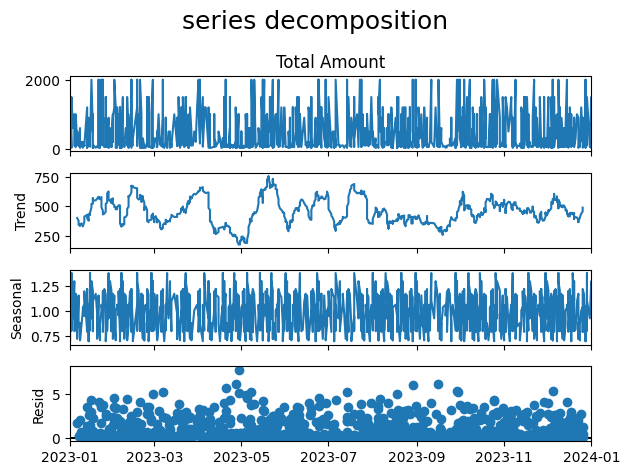

In [57]:

result=seasonal_decompose(df['Total Amount'],model='multiplicative',period=30)
plt.figure(figsize=(12,8))
result.plot()
plt.suptitle('series decomposition',fontsize=18)
plt.tight_layout()
plt.show()

CUSTOMER AND PRODUCT ANALYSIS

In [58]:
df.Gender.value_counts()

,count
Gender,
Female,510
Male,490


In [49]:
df.groupby('Customer ID')['Total Amount'].sum()

,Total Amount
Customer ID,
CUST001,150
CUST002,1000
CUST003,30
CUST004,500
CUST005,100
...,...
CUST995,30
CUST996,50
CUST997,90


In [50]:
customer_total_sales = df.groupby('Customer ID')['Total Amount'].sum()
most_patronized_customer_id = customer_total_sales.idxmax()
highest_total_sales = customer_total_sales.max()

print(f"The customer ID who patronized the most is: {most_patronized_customer_id}")
print(f"Their total sales amount is: {highest_total_sales}")

The customer ID who patronized the most is: CUST015
Their total sales amount is: 2000


In [65]:
df_reset = df.reset_index()
print(df_reset[df_reset['Customer ID'] == 'CUST015'][['Product Category','Total Amount', 'Gender', 'Date']].drop_duplicates())

   Product Category  Total Amount  Gender       Date
38      Electronics          2000  Female 2023-01-16


In [66]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


In [67]:
df["Total Amount"].sum()

np.int64(456000)

In [69]:
df.reset_index(inplace=True)

df_as=df[["Date","Gender","Age","Product Category","Quantity","Price per Unit","Total Amount"]]
df_as.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-01-01,Male,46,Beauty,3,500,1500
1,2023-01-01,Male,41,Clothing,3,300,900
2,2023-01-01,Female,40,Clothing,4,300,1200
3,2023-01-02,Male,19,Electronics,3,30,90
4,2023-01-02,Female,19,Beauty,1,25,25


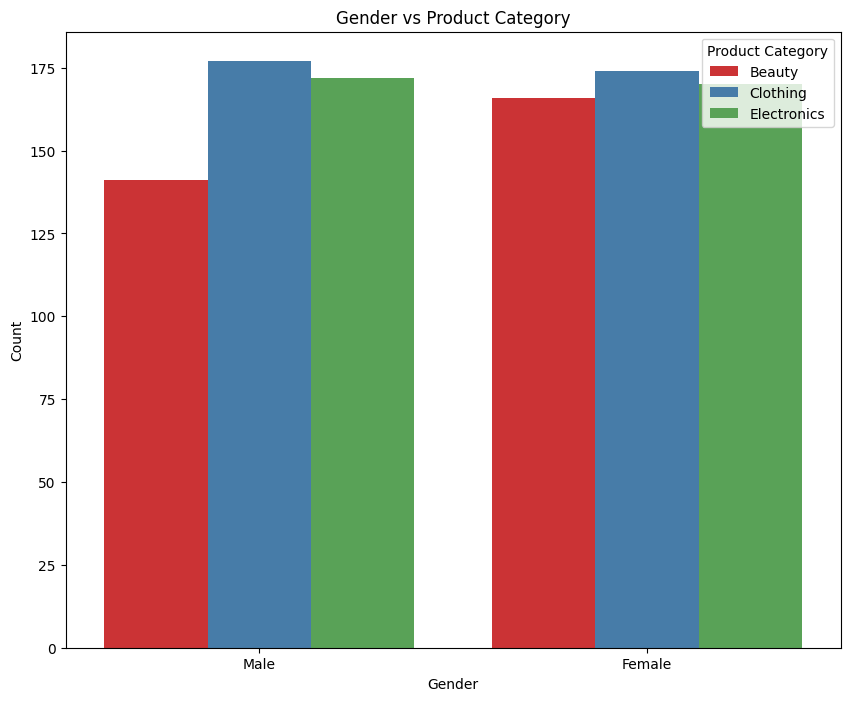

In [70]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Gender', hue='Product Category', data=df, palette='Set1')
plt.title('Gender vs Product Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Product Category', loc='upper right')
plt.show()

Text(0.5, 1.0, 'total Quantity Sold')

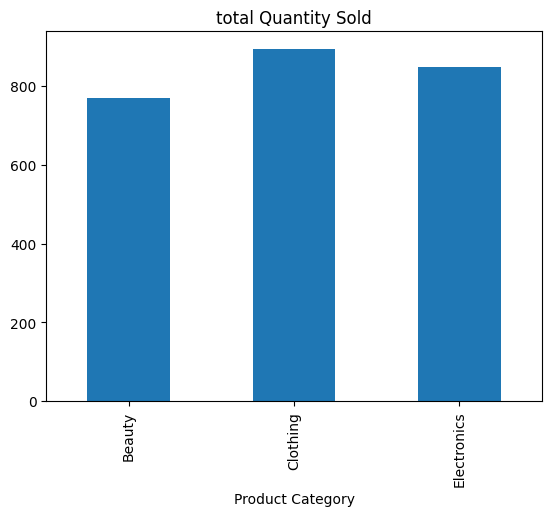

In [71]:
df_as.groupby('Product Category')['Quantity'].sum().plot(kind="bar");plt.title("total Quantity Sold")

In [ ]:
df_as.groupby('Product Category')['Quantity'].sum()

,Quantity
Product Category,
Beauty,771
Clothing,894
Electronics,849


In [ ]:
df_as.groupby('Gender')['Product Category'].value_counts()

Gender  Product Category
Female  Clothing            174
        Electronics         170
        Beauty              166
Male    Clothing            177
        Electronics         172
        Beauty              141
Name: count, dtype: int64

Text(0.5, 1.0, 'total amount per Product Category')

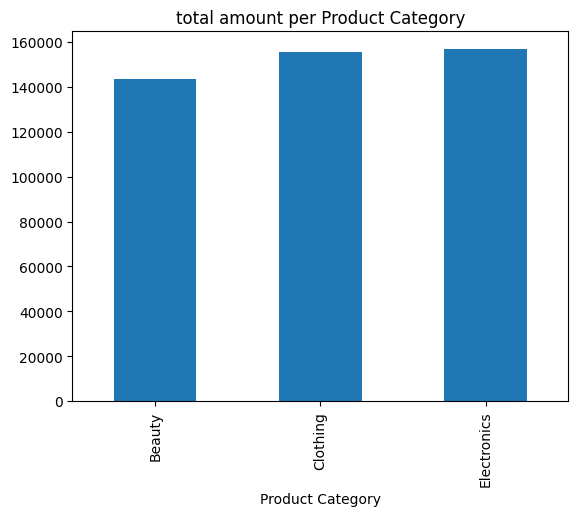

In [ ]:
df_as.groupby('Product Category')['Total Amount'].sum().plot(kind="bar");plt.title("total amount per Product Category")

In [ ]:
df_as.groupby('Gender')['Total Amount'].sum()

,Total Amount
Gender,
Female,232840
Male,223160


Text(0.5, 1.0, 'total amount by gender')

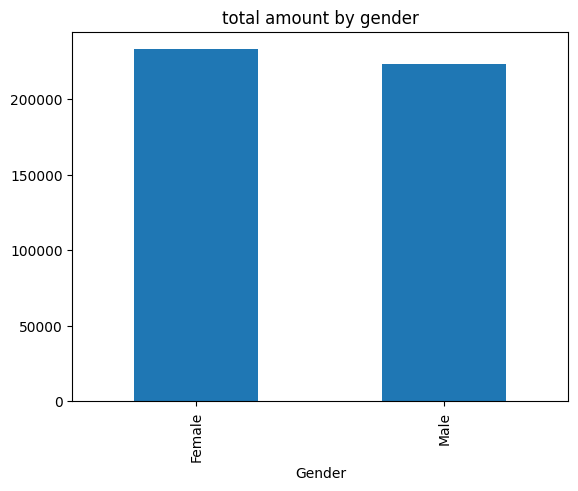

In [ ]:
df_as.groupby('Gender')['Total Amount'].sum().plot(kind="bar");plt.title("total amount by gender")

In [ ]:

df_as.groupby(['Gender', 'Product Category'])['Total Amount'].sum()

Gender  Product Category
Female  Beauty              74830
        Clothing            81275
        Electronics         76735
Male    Beauty              68685
        Clothing            74305
        Electronics         80170
Name: Total Amount, dtype: int64

In [ ]:
def categorize_age(age):
    if 18 <= age <= 30:
        return 'Adult'
    elif 31 <= age <= 40:
        return 'Middle Aged'
    elif 41 <= age <= 50:
        return 'Elderly'
    elif 51 <= age <= 64:
        return 'Old'
    else:
        return 'Other'


df_as['Age_Group'] = df_as['Age'].apply(categorize_age)


<ipython-input-37-c03db4747601>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['Age_Group'] = df_as['Age'].apply(categorize_age)


In [ ]:
df_as.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_Group
Date,,,,,,,
2023-01-01,Male,46,Beauty,3,500,1500,Elderly
2023-01-01,Male,41,Clothing,3,300,900,Elderly
2023-01-01,Female,40,Clothing,4,300,1200,Middle Aged
2023-01-02,Male,19,Electronics,3,30,90,Adult
2023-01-02,Female,19,Beauty,1,25,25,Adult


Text(0.5, 1.0, 'total amount by age_group')

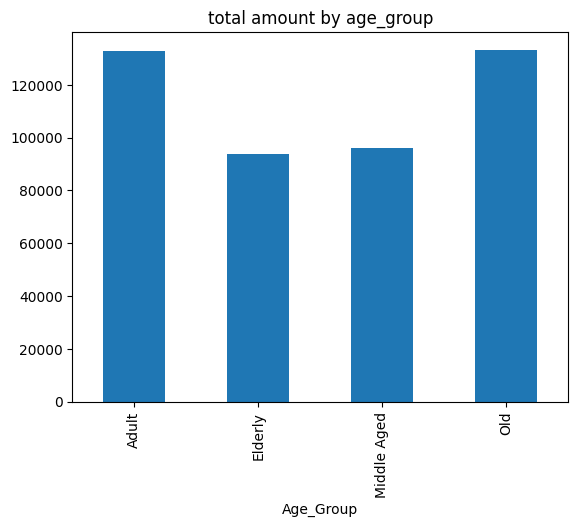

In [ ]:
df_as.groupby('Age_Group')['Total Amount'].sum().plot(kind="bar");plt.title("total amount by age_group")

In [ ]:
df_as.groupby('Age_Group')['Total Amount'].sum()

,Total Amount
Age_Group,
Adult,132945
Elderly,93795
Middle Aged,95950
Old,133310


In [ ]:
df_as.groupby('Age_Group')['Gender'].value_counts()

Age_Group    Gender
Adult        Female    139
             Male      134
Elderly      Female    116
             Male      105
Middle Aged  Female     97
             Male       96
Old          Female    158
             Male      155
Name: count, dtype: int64

In [ ]:
df_as.groupby('Age_Group')['Product Category'].value_counts()

Age_Group    Product Category
Adult        Beauty               97
             Clothing             88
             Electronics          88
Elderly      Clothing             81
             Electronics          74
             Beauty               66
Middle Aged  Clothing             69
             Electronics          68
             Beauty               56
Old          Clothing            113
             Electronics         112
             Beauty               88
Name: count, dtype: int64

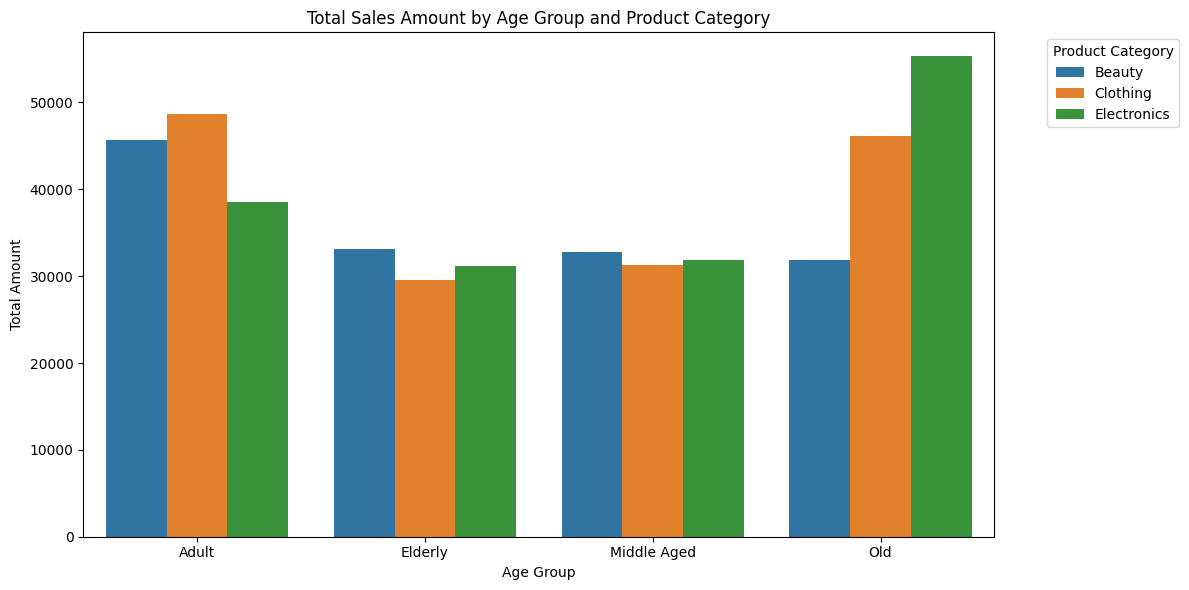

In [ ]:
grouped_data = df_as.groupby(['Age_Group', 'Product Category'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))

sns.barplot(data=grouped_data, x='Age_Group', y='Total Amount', hue='Product Category')

plt.title('Total Sales Amount by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df_as.groupby(['Gender','Product Category', 'Age_Group'])['Total Amount'].sum()

Gender  Product Category  Age_Group  
Female  Beauty            Adult          22675
                          Elderly        14035
                          Middle Aged    19710
                          Old            18410
        Clothing          Adult          25120
                          Elderly        18095
                          Middle Aged    13275
                          Old            24785
        Electronics       Adult          22015
                          Elderly        12845
                          Middle Aged    17605
                          Old            24270
Male    Beauty            Adult          23035
                          Elderly        19060
                          Middle Aged    13115
                          Old            13475
        Clothing          Adult          23550
                          Elderly        11445
                          Middle Aged    17975
                          Old            21335
        Electronics       Adult          16550
                          Elderly        18315
                          Middle Aged    14270
                          Old            31035
Name: Total Amount, dtype: int64

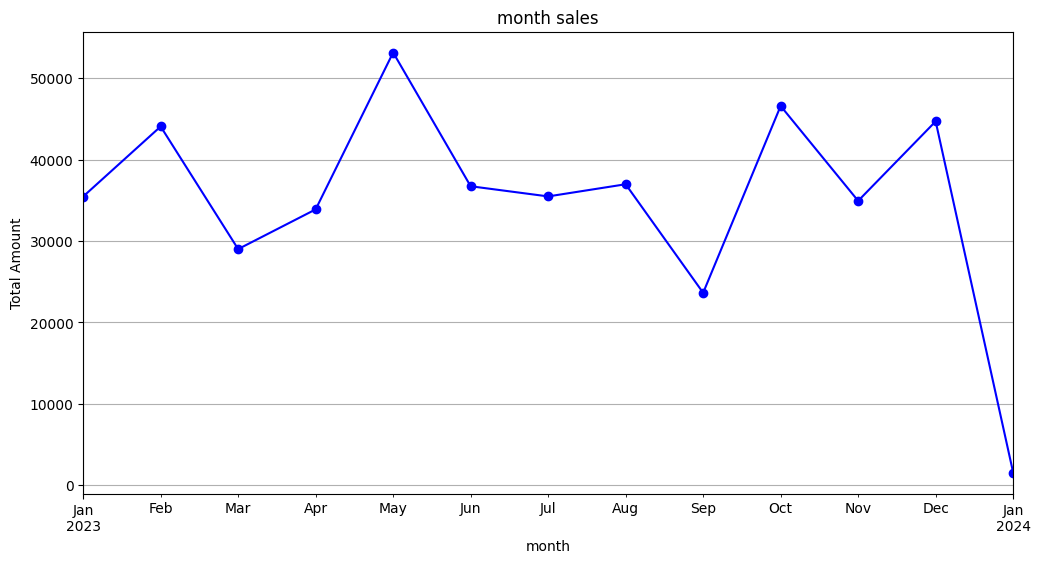

In [75]:
month_sales=df_as.groupby(df_as['Date'].dt.to_period('M'))['Total Amount'].sum()

plt.figure(figsize=(12,6))
month_sales.plot(kind='line',marker='o',color='blue',linestyle='-')
plt.title('month sales')
plt.xlabel('month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [76]:
df_as['DayName']=df_as['Date'].dt.day_name()

<ipython-input-76-7a41bda28d4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['DayName']=df_as['Date'].dt.day_name()


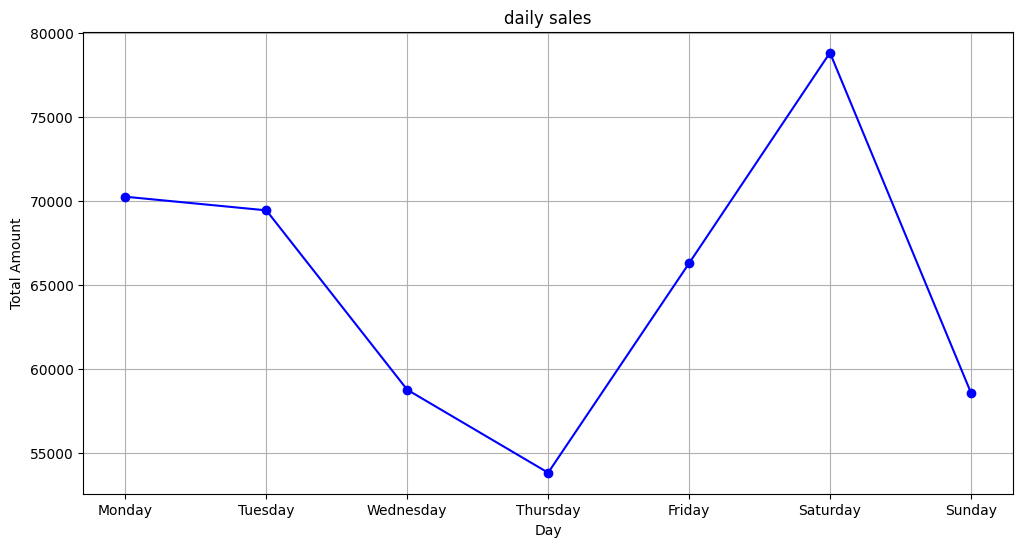

In [77]:
daily_sales=df_as.groupby(df_as['DayName'])['Total Amount'].sum()
days_of_week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales=daily_sales.reindex(days_of_week)
plt.figure(figsize=(12,6))
daily_sales.plot(kind='line',marker='o',color='blue',linestyle='-')
plt.title('daily sales')
plt.xlabel('Day')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

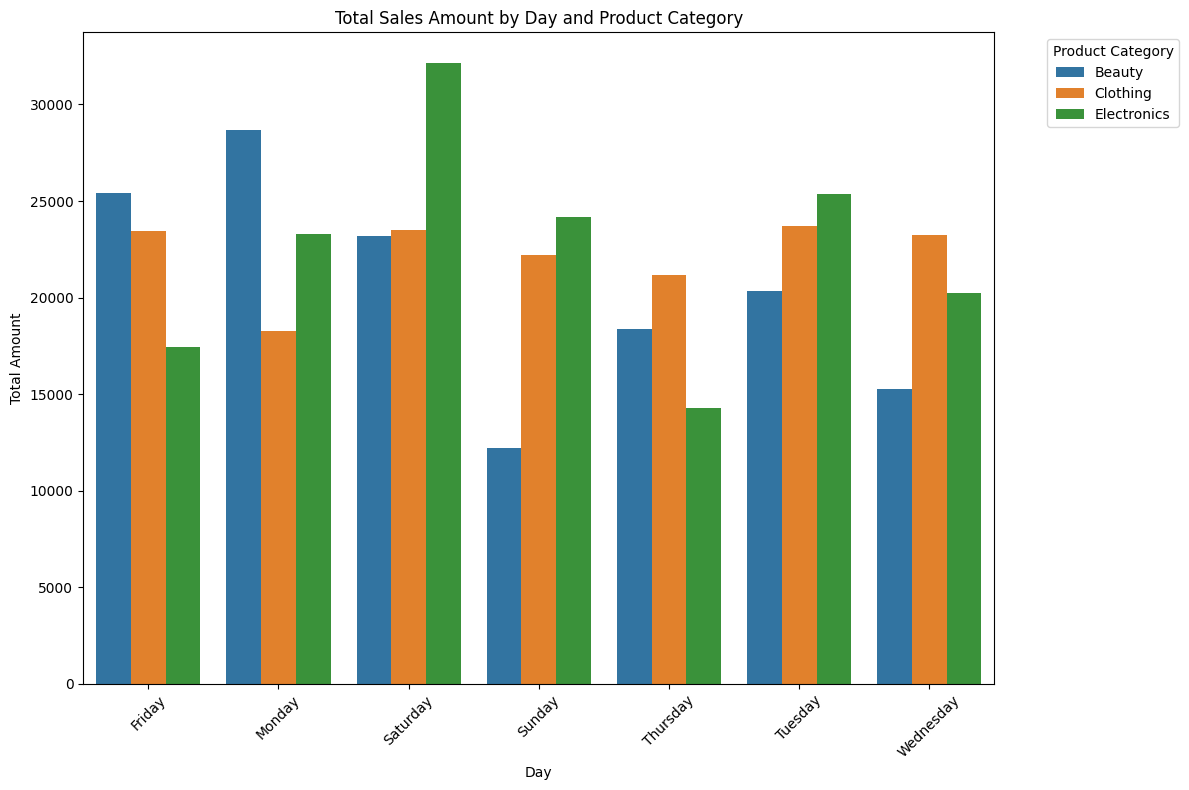

In [78]:

daily_product_sales = df_as.groupby(['DayName', 'Product Category'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(12,8))

# Corrected the argument name from df_as= to data=
sns.barplot(data=daily_product_sales, x='DayName', y='Total Amount', hue='Product Category')

plt.title('Total Sales Amount by Day and Product Category')
plt.xlabel('Day')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [79]:
 df_as.groupby(['DayName', 'Product Category'])['Total Amount'].sum()

DayName    Product Category
Friday     Beauty              25395
           Clothing            23455
           Electronics         17440
Monday     Beauty              28685
           Clothing            18275
           Electronics         23290
Saturday   Beauty              23205
           Clothing            23480
           Electronics         32130
Sunday     Beauty              12210
           Clothing            22195
           Electronics         24195
Thursday   Beauty              18380
           Clothing            21190
           Electronics         14265
Tuesday    Beauty              20355
           Clothing            23725
           Electronics         25360
Wednesday  Beauty              15285
           Clothing            23260
           Electronics         20225
Name: Total Amount, dtype: int64

Who buys on each day of the week:
Gender     Female  Male
DayName                
Monday         77    69
Tuesday        83    78
Wednesday      67    72
Thursday       63    60
Friday         65    78
Saturday       79    71
Sunday         76    62


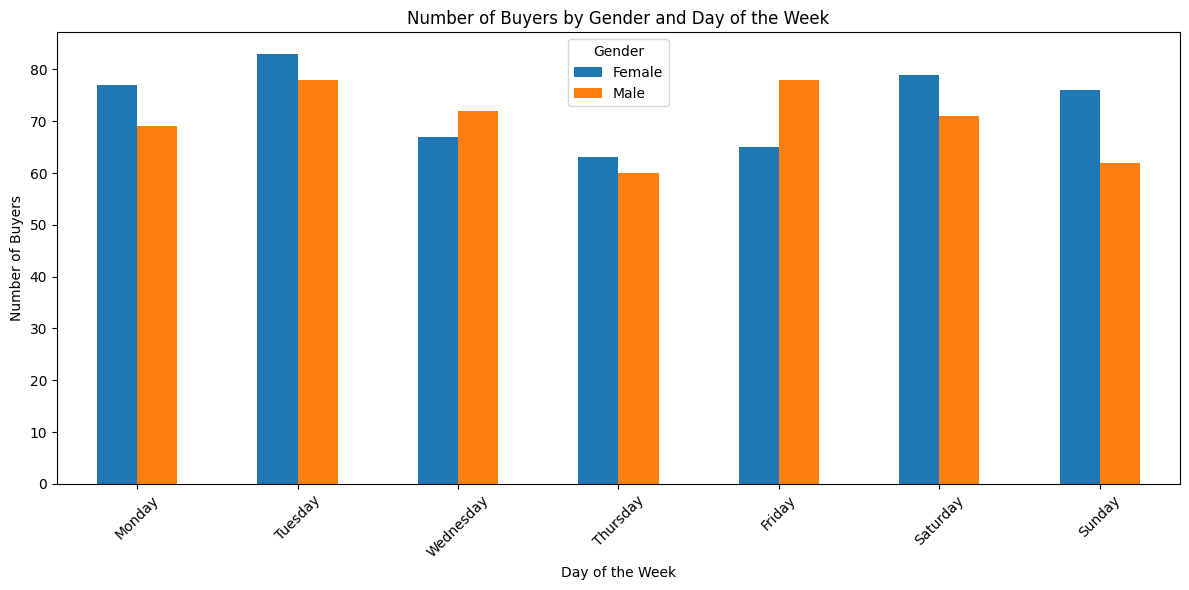

In [80]:

buyers_by_day = df_as.groupby(['DayName', 'Gender']).size().unstack(fill_value=0)


days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
buyers_by_day = buyers_by_day.reindex(days_of_week)

print("Who buys on each day of the week:")
print(buyers_by_day)

buyers_by_day.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Buyers by Gender and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [81]:

sales_date = df_as.groupby('Date')['Total Amount'].sum()


date_max_sales = sales_date.idxmax()
max_sales_amount = sales_date.max()

print(f"The date with the highest sales is: {date_max_sales.date()}")
print(f"The total sales amount on this date was: {max_sales_amount}")

The date with the highest sales is: 2023-05-23
The total sales amount on this date was: 8455


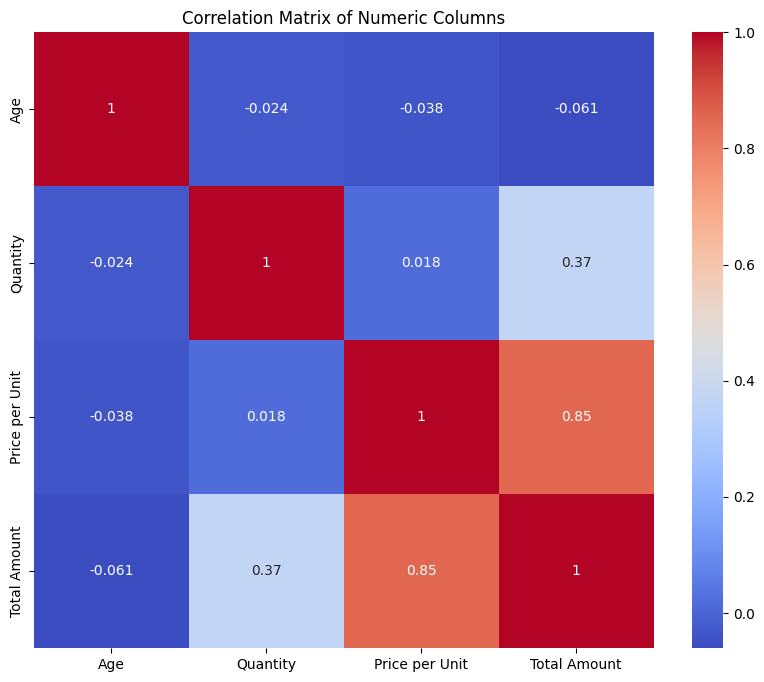

In [ ]:
numeric_df_as = df_as.select_dtypes(include=np.number)

correlation_matrix = numeric_df_as.corr()
plt.figure(figsize=(10, 8)) # Optional: Adjust figure size for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns') # Optional: Add a title
plt.show()

RECOMMENDATIONS


Based on the analysis, we see clear patterns in which products sell best on certain days of the week and how different age groups have distinct purchasing habits for product categories.

**Recommendation:** Implement targeted marketing campaigns and in-store promotions that align with these identified trends.

*   **For Daily Trends:** Highlight the product categories that perform well on specific days. For example, "Electronics" are popular on Saturdays, create a "Saturday Tech Special" promotion. Similarly,  "Clothing" sells well on Tuesdays, feature new arrivals or offer discounts on clothing on Tuesdays.
*   **For Age-Group Trends:** Tailor your marketing messages and product displays to resonate with the purchasing preferences of different age groups. younger customers are primarily buying "Clothing," focus your social media advertising towards that demographic featuring clothing items.  older age group prefers  buying electronics for replacements, adopting new technologies, staying connected,driven by factors like disposable income and specific needs.

By strategically aligning your promotional efforts with these proven buying patterns, you can more effectively attract the right customers at the right time with the right products, ultimately leading to increased sales and customer engagement.
